### Importing modules 

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np 

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn import *

## 1. Preprocessing Data

In [156]:
#Reading CSV file
arq = "data_processed.csv"
m = pd.read_csv(arq, sep=',')

### Normalizing the data

In [153]:
m

,phase3_duration,phase3_Peso_avg,phase3_Presion_avg,phase3_Presion_max,phase3_Visco_max,phase3_Densidad_max
0,10.0,0.0000,0.234332,0.234375,0.00000,0.000
1,27985.0,4504.4478,1.237560,2.526042,559.38000,63897.484
2,16935.0,5678.3500,1.288355,2.867477,579.17755,66975.870
3,3345.0,29858.3710,1.915336,3.003472,717.00000,62665.250
4,21430.0,4409.2380,1.260862,2.881945,900.00000,64876.690
...,...,...,...,...,...,...
328,175.0,57997.4300,2.974042,2.980324,0.00000,58302.473
329,3265.0,23674.0200,1.856862,3.220486,826.00000,60995.625
330,175.0,57997.4300,2.974042,2.980324,0.00000,58302.473
331,3265.0,23674.0200,1.856862,3.220486,826.00000,60995.625


In [133]:
#Normalizing the DataFrame using preprocessing scaler of sklearn
x = m.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
m = pd.DataFrame(x_scaled)
m

,0,1,2,3,4,5
0,0.000000,0.000000,0.035204,0.000000,0.000000,0.000000
1,0.191053,0.073309,0.358522,0.755005,0.065578,0.869046
2,0.115588,0.092414,0.374892,0.867493,0.067899,0.910914
3,0.022776,0.485940,0.576954,0.912297,0.084056,0.852287
4,0.146286,0.071760,0.366032,0.872259,0.105510,0.882364
...,...,...,...,...,...,...
328,0.001127,0.943898,0.918152,0.904671,0.000000,0.792950
329,0.022230,0.385290,0.558110,0.983794,0.096835,0.829579
330,0.001127,0.943898,0.918152,0.904671,0.000000,0.792950
331,0.022230,0.385290,0.558110,0.983794,0.096835,0.829579


### Split the dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [145]:
#Train and Test Split
msk = np.random.rand(len(m)) < 0.80

train = m[msk]
test = m[~msk]

## 2. Training the model

In [146]:
#Modeling Training
model = linear_model.LinearRegression()
train_x = np.asanyarray(train[[0,1,2,3,4]])
train_y = np.asanyarray(train[[5]])
model = model.fit(train_x, train_y)
# The coefficients
print ('Intercept: ', model.intercept_)
print ('Coefficients: ', model.coef_)

Intercept:  [0.10829946]
Coefficients:  [[ 0.33168688  0.35572476 -0.6084219   1.00683016  0.00170674]]


## 3. Running the prediction 

In [147]:
#PREDICTION
y_pred= model.predict(test[[0,1,2,3,4]])
x = np.asanyarray(test[[0,1,2,3,4]])
y = np.asanyarray(test[[5]])
# print("Mean Squared error(MSE): %.2f"
#       % np.mean((y_pred - y) ** 2))


# print('Variance score: %.2f' % model.score(x, y))

## 4. Getting all the metrics to analyze

In [148]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('Explained_variance: ', round(explained_variance,4))    
    print('Mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('R2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [149]:
regression_results(y, y_pred)

Explained_variance:  0.8967
Mean_squared_log_error:  0.0027
R2:  0.8967
MAE:  0.0632
MSE:  0.0073
RMSE:  0.0854


## 5. Plotting the results 

### Plotting the Multiple Linear Regression 

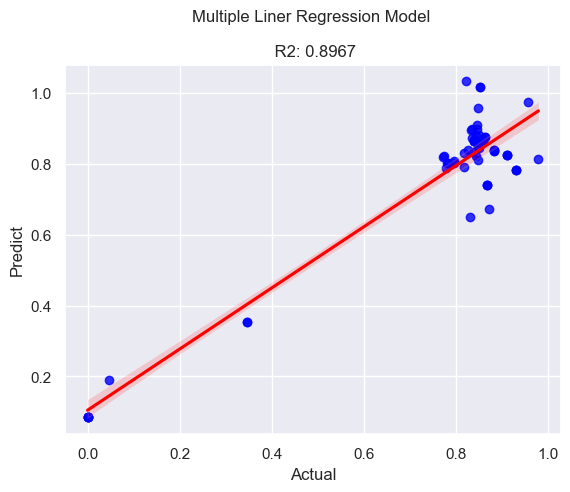

In [151]:
ax = sns.regplot(x=y, y=y_pred,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"}).set(title=f'Multiple Liner Regression Model \n \n R2: {round(metrics.r2_score(y, y_pred),4)}')

plt.xlabel("Actual")
plt.ylabel("Predict")

plt.show()

### Preprocessing data to plot the actual versus predict

In [140]:
list_y = [valor for sublist in y for valor in sublist]
list_y_pred = [valor for sublist in y_pred for valor in sublist]

In [141]:
pred_df=pd.DataFrame({'Actual Value':list_y,'Predicted Value':list_y_pred})
# pred_df['Difference'] = pred_df['Actual Value'] - pred_df['Predicted Value']

pred_df.index = range(len(pred_df.index))

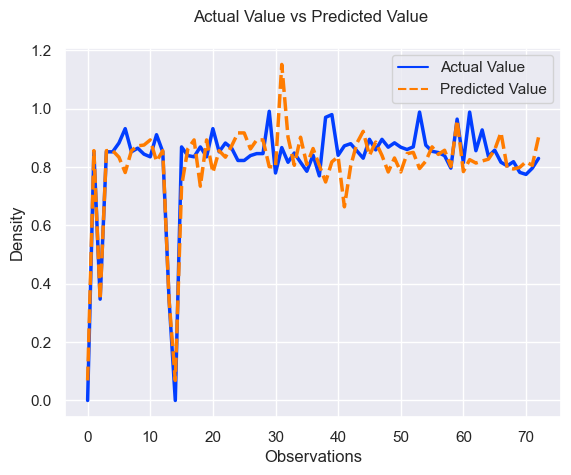

In [142]:
# Plotando um gráfico de linhas com duas linhas no eixo y
sns.set(style="darkgrid")  # Define o estilo do gráfico

# Cria o gráfico de linhas com dois conjuntos de dados
sns.lineplot(data=pred_df, palette="bright", linewidth=2.5)

# Define os rótulos e o título do gráfico
plt.xlabel('Observations')
plt.ylabel('Density')
plt.title('Actual Value vs Predicted Value \n')

# Mostra o gráfico
plt.show()

### The function to make the predict by inputting the parameters

In [143]:
coeff = model.coef_[0]
intercept = model.intercept_

def predict_density(duration, peso_avg, presion_avg, presion_max, visco_max):
    density = intercept[0] + (coeff[0]*duration) + (coeff[1]*peso_avg) + (coeff[2]*presion_avg) + (coeff[3]*presion_max) + (coeff[4]*visco_max)
    
    return print('The Density is: ' + str(round(density,4)))

### Running the function to predictive density

In [144]:
predict_density(0.022230,0.385290,0.558110,0.983794,0.096835)  

The Density is: 0.902
